<h1 style="text-align: center;">Simulación y aplicaciones en ciencias sociales y experimentales
</h3>
<h3 style="text-align: center;"> Tema 2.2 Modelos deterministas de segundo orden </h3>
<h3 style="text-align: center;"> Ejercicios 1 </h3>

### Ejercicio 1

Dado el modelo de depredador-presa de Lotka-Volterra, 

$$\frac{dx_1}{dt} = rx_1-ax_1x_2,\\ \frac{dx_2}{dt} = bx_1x_2-mx_2,$$

donde $x_1$ y $x_2$ indican las poblaciones (en número) de liebres y linces, respectivamente. 

**(a)** Hallar el espacio de fases para distintas condiciones iniciales de las especies. 

**(b)** Considerar que las presas (liebres) siguen un patrón de crecimiento logístico, no lineal. Comprobar la trayectoria de ambas especies a largo plazo. 

**(c)** Considerar que los depredadores (linces) tienen una capacidad limitada de ingesta de liebres por periodo de tiempo.  

#### Solución Ejercicio 1 (a)

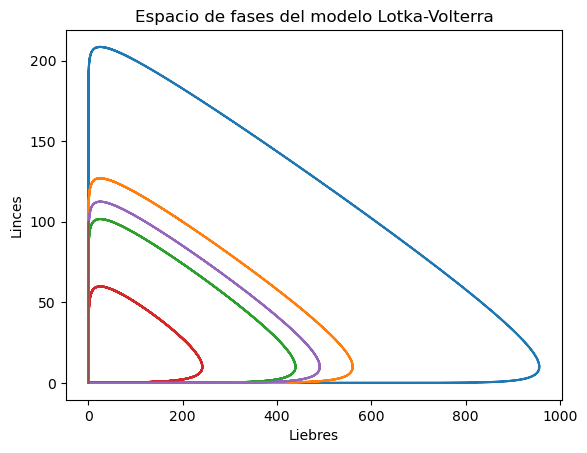

In [1]:
###LIBRERÍAS
##-------------------------------
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

"""" definición del modelo"""

def sys(x, t, r,a,m,b):
    dx1dt=(r-a*x[1])*x[0]
    dx2dt=(b*x[0]-m)*x[1]
    return np.array([dx1dt, dx2dt])

"""" definición del intervalo de tiempo"""

timestep = 0.01 #probar con 1, 0.1, 0.01, 0.001, 0.0001
t0=0
tf=100
t = np.linspace(t0, tf, int((tf-t0)/timestep+1))

"""" definición de los parámetros"""
r = 1  # birth rate of rabbits
a = 0.1 # death rate of rabbits due to predation
m = 0.5 # natural death rate of lynx
b = 0.02 # factor that describes surviving of lynx due to predation

"""" valores iniciales de las variables de estado"""

x0=[]
x0.append(np.array([100, 200]))
x0.append(np.array([200, 100]))
x0.append(np.array([50, 100]))
x0.append(np.array([100, 50]))
x0.append(np.array([1, 100]))
x0.append(np.array([0, 100]))
#x0.append(np.array([100, 0]))


"""" aplicando el método de runge kutta"""

def solveODE_RK4(f, x0, t, args=()):
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(x[i], t[i], *args)
        k2 = f(x[i] + k1 * h / 2., t[i] + h / 2., *args)
        k3 = f(x[i] + k2 * h / 2., t[i] + h / 2., *args)
        k4 = f(x[i] + k3 * h, t[i] + h, *args)
        x[i+1] = x[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return x

sol=[]
for i in range(len(x0)):
     sol.append(solveODE_RK4(sys, x0[i], t, args=(r,a,m,b)))

""""gráficas"""

x1_sim=[]
x2_sim=[]
for i in range(len(x0)):
    x1_sim.append(sol[i][:,0])
    x2_sim.append(sol[i][:,1])


# deterministic phase portrait
for i in range(len(x0)):
     plt.plot(x1_sim[i],x2_sim[i])
plt.xlabel('Liebres')
plt.ylabel('Linces')
plt.title('Espacio de fases del modelo Lotka-Volterra')
plt.show()


Como se puede observar, las poblaciones de ambas especies oscilan en trayectorias estables alrededor de un punto de equilibrio. Este comportamiento anuncia que la matriz jacobiana del sistema en ese punto de equilibrio estable debe de tener unos **valores propios imaginarios puros** (ejercicio).

#### Solución Ejercicio 1 (b)

Veamos ahora el modelo con un **crecimiento logístico** de las liebres:

$$\begin{array}{l} \frac{dx_1}{dt} = rx_1(1-\frac{x_1}{K})-ax_1x_2,\\ \frac{dx_2}{dt} = bx_1x_2-mx_2,\end{array}$$

donde el nuevo parámetro $K$ indica la población máxima que puede alcanzar la presa. El resultado de la simulación de este sistema es el siguiente. 


3.0162914000205308
36.53167253201933


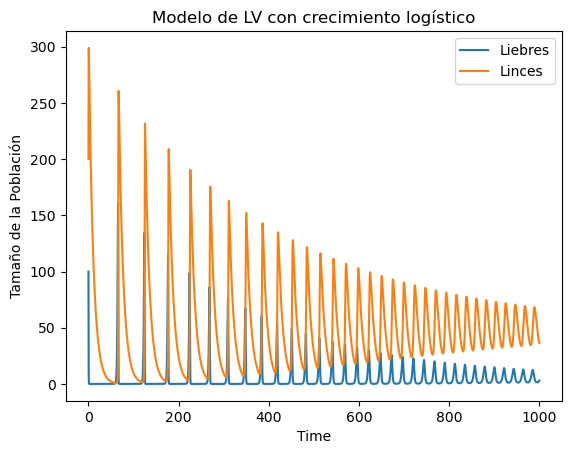

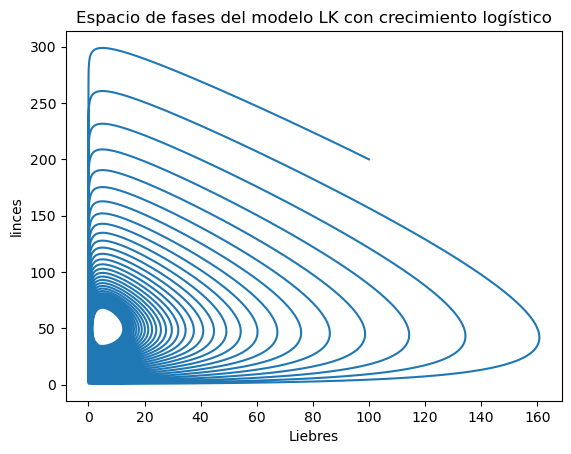

In [2]:
###LIBRERÍAS
##-------------------------------
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

"""" definición del modelo"""

def sys(x, t, r,a,m,b,K):
    dx1dt=r*x[0]*(1-x[0]/K)-a*x[0]*x[1]
    dx2dt=(b*x[0]-m)*x[1]
    return np.array([dx1dt, dx2dt])

"""" definición del intervalo de tiempo"""

timestep = 0.01 #probar con 1, 0.1, 0.01, 0.001, 0.0001
t0=0
tf=1000
t = np.linspace(t0, tf, int((tf-t0)/timestep+1))

"""" definición de los parámetros"""
r = 1  # birth rate of rabbits
a = 0.02 # death rate of rabbits due to predation
m = 0.1 # natural death rate of lynx
b = 0.02 # factor that describes surviving of lynx due to predation
K= 1000 # Población máxima de la presa 

"""" valores iniciales de las variables de estado"""
x0_0=100
x1_0=200
x0 = np.array([x0_0, x1_0])


"""" aplicando el método de Runge-Kutta 4"""

def solveODE_RK4(f, x0, t, args=()):
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(x[i], t[i], *args)
        k2 = f(x[i] + k1 * h / 2., t[i] + h / 2., *args)
        k3 = f(x[i] + k2 * h / 2., t[i] + h / 2., *args)
        k4 = f(x[i] + k3 * h, t[i] + h, *args)
        x[i+1] = x[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return x

sol = solveODE_RK4(sys, x0, t, args=(r,a,m,b,K))



""""gráficas"""

x0_sim=sol[:,0]
x1_sim=sol[:,1]

print(x0_sim[-1])
print(x1_sim[-1])

# visualization of deterministic populations against time
plt.plot(t, x0_sim)
plt.plot(t, x1_sim)
plt.xlabel('Time')
plt.ylabel('Tamaño de la Población')
plt.legend(('Liebres', 'Linces'))
plt.title('Modelo de LV con crecimiento logístico')
plt.show()

# deterministic phase portrait
plt.plot(x0_sim,x1_sim)
plt.xlabel('Liebres')
plt.ylabel('linces')
plt.title('Espacio de fases del modelo LK con crecimiento logístico')
plt.show()


Como se puede observar, al incorporar el crecimiento logístico en la población de la presa, las trayectorias dejan de ser concéntricas para converger asintóticamente a un punto de equilibrio en forma de trayectorias cíclicas amortiguadas. 

Se puede comprobar que este comportamiento cíclico y convergente al punto de equilibrio es robusto frente a cambios en las condiciones iniciales y cambios moderados de los parámetros (ejercicio). 

Por tanto, es de esperar que el jacobiano del sistema en el punto de equilibrio al que convergen las trayectorias tiene unos **valores propios imaginarios con parte real negativa** (ejercicio).

#### Solución Ejercicio 1 (c)

En los modelos anteriores se asume que el consumo por periodo de cada depredador sigue la expresión $C(x_1) = a x_1$ (ver ecuacion de arriba). Esta expresión indica que el único límite en el consumo de cada depredador es la abundancia de la presa, no su saciedad. 

Más realista sería considerar que hay una saciedad en el consumo del depredador, de tal manera que el consumo se satura en un cierto nivel. Esto podría venir representado por la expresión $C(x_1) = \gamma \frac{x_1}{A+x_1}$, donde $\gamma$ indica la cantidad máxima de presas consumidas por depredador en ese periodo de tiempo. El parámetro $A$ regula la capacidad del depredador de cazar a las presas. 

Se puede considerar que la sobrevivencia del depredador es directamente proporcional al consumo de presas, por lo que el sistema quedaría:  

$$\begin{array}{l} \frac{dx_1}{dt} = rx_1(1-\frac{x_1}{K})-\gamma \frac{x_1}{A+x_1}x_2,\\ \frac{dx_2}{dt} = \delta \frac{x_1}{A+x_1}x_2-mx_2,\end{array}$$

donde el nuevo parámetro $\delta$ indicaría la relación entre el consumo de la presa y la sobrevivencia del depredador. Seguidamente simulamos el modelo para unos valores de los parámetros semejantes a los de los modelos anteriores. 

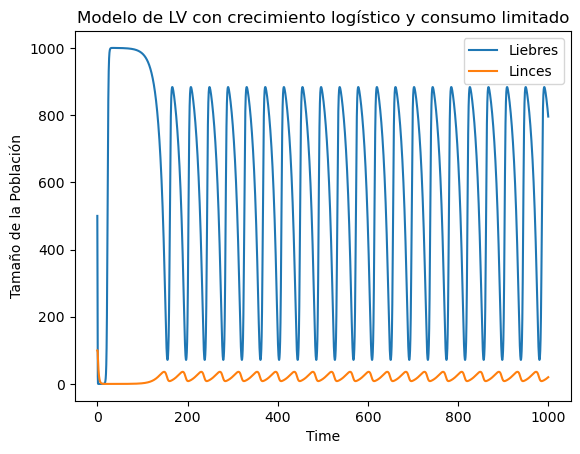

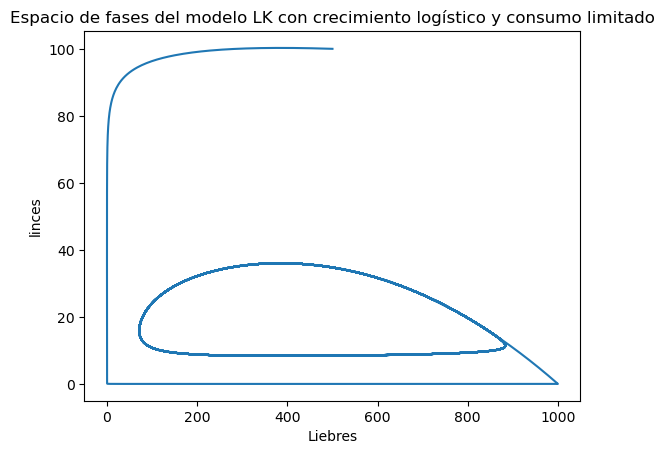

In [3]:
###LIBRERÍAS
##-------------------------------
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

"""" definición del modelo"""

def sys(x, t, r,gamma,m,delta,K,A):
    dx1dt=r*x[0]*(1-x[0]/K)-gamma*x[0]/(A+x[0])*x[1]
    dx2dt=(delta*x[0]/(A+x[0])-m)*x[1]
    return np.array([dx1dt, dx2dt])

"""" definición del intervalo de tiempo"""

timestep = 0.01 #probar con 1, 0.1, 0.01, 0.001, 0.0001
t0=0
tf=1000
t = np.linspace(t0, tf, int((tf-t0)/timestep+1))

"""" definición de los parámetros"""
r = 1  # birth rate of rabbits
gamma = 10 # maximum consumption per predator
m = 0.5 # natural death rate of lynx
delta = 0.63 # factor that describes surviving of lynx due to consumption
K= 1000 #maximum population of rabbits
A= 100 #number of rabbis where predators consume half of maximum consumption

"""" valores iniciales de las variables de estado"""
x0_0=500
x1_0=100
x0 = np.array([x0_0, x1_0])

"""" aplicando el método de Runge-Kutta 4"""

def solveODE_RK4(f, x0, t, args=()):
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(x[i], t[i], *args)
        k2 = f(x[i] + k1 * h / 2., t[i] + h / 2., *args)
        k3 = f(x[i] + k2 * h / 2., t[i] + h / 2., *args)
        k4 = f(x[i] + k3 * h, t[i] + h, *args)
        x[i+1] = x[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return x

sol = solveODE_RK4(sys, x0, t, args=(r,gamma,m,delta,K,A))

""""gráficas"""

x0_sim=sol[:,0]
x1_sim=sol[:,1]

# visualization of deterministic populations against time
plt.plot(t, x0_sim)
plt.plot(t, x1_sim)
plt.xlabel('Time')
plt.ylabel('Tamaño de la Población')
plt.legend(('Liebres', 'Linces'))
plt.title('Modelo de LV con crecimiento logístico y consumo limitado')
plt.show()

# deterministic phase portrait
plt.plot(x0_sim,x1_sim)
plt.xlabel('Liebres')
plt.ylabel('linces')
plt.title('Espacio de fases del modelo LK con crecimiento logístico y consumo limitado')
plt.show()


Aunque finalmente obtenemos oscilaciones estables, este caso es diferente del inicial. El comportamiento cíclico final es **independiente de las condiciones iniciales del sistema** (observar como ejercicio la solución para diferentes condiciones inciales). En ese caso se dice que el sistema converge a un **ciclo límite**. 

A partir de un punto de equilibrio asintóticamente estable se puede pasar, modificando los parámetros del sistema, a un ciclo límite. Se puede comprobar este hecho estudiando las trayectorias para distintos valores del parámetro $\delta$ (ejercicio). 

Un estudio más detallado de este modelo se puede encontrar en este [documento](https://www.ucl.ac.uk/~ucess29/page2/MATH3506Chapters//MATH3506Chapter4.pdf) de la University College London. 

## Referencias

[1] - Hills, A. (2023). Modelling Predator-Prey Systems in Python.https://github.com/INASIC/predator-prey_systems/tree/master

[2] - Hoppensteadt, F. (2006). "Predator-prey model". Scholarpedia. p. 1563.

[3] - Velten, K. (2010). Mathematical Modeling and Simulation. Wiley.